In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv("Battery_dataset.csv")
df.head()



battery_id  cycle       chI       chV        chT      disI      disV  \
0         B5      1  1.440147  4.254682  23.988733  1.894407  3.273523   
1         B5      2  1.416595  4.159825  25.665347  1.829949  4.038741   
2         B5      3  1.420272  4.276323  25.407910  1.942105  3.214433   
3         B5      4  1.337680  4.236697  27.069757  2.073577  3.134529   
4         B5      5  1.263946  4.142791  26.478353  2.049885  3.729341   

        disT       BCt        SOH  RUL  
0  32.980834  1.986196  99.309790  219  
1  32.257920  1.986240  99.311985  218  
2  35.134801  1.984252  99.212608  217  
3  32.082988  1.969236  98.461812  216  
4  32.483154  1.974862  98.743106  215

In [5]:
print(f"\n Dataset Shape: {df.shape}")


 Dataset Shape: (680, 11)


In [6]:
print("\n Column Names:")
print(df.columns.tolist())


 Column Names:
['battery_id', 'cycle', 'chI', 'chV', 'chT', 'disI', 'disV', 'disT', 'BCt', 'SOH', 'RUL']


In [7]:
print("\n Data Info:")
print(df.info())


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   battery_id  680 non-null    object 
 1   cycle       680 non-null    int64  
 2   chI         680 non-null    float64
 3   chV         680 non-null    float64
 4   chT         680 non-null    float64
 5   disI        680 non-null    float64
 6   disV        680 non-null    float64
 7   disT        680 non-null    float64
 8   BCt         680 non-null    float64
 9   SOH         680 non-null    float64
 10  RUL         680 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 58.6+ KB
None


In [8]:

# Describe numerical columns
print("\n Statistical Summary:")
print(df.describe())


 Statistical Summary:
            cycle         chI         chV         chT        disI        disV  \
count  680.000000  680.000000  680.000000  680.000000  680.000000  680.000000   
mean   114.470588    1.400069    4.202765   26.871113    2.007630    3.501070   
std     66.601594    0.102903    0.046973    1.489824    0.097797    0.304160   
min      1.000000    1.000859    4.035078   21.604784    1.702438    2.484857   
25%     57.000000    1.333381    4.170685   25.822944    1.945474    3.299257   
50%    114.000000    1.401904    4.202503   26.823350    2.006990    3.496967   
75%    170.250000    1.469383    4.235014   27.944619    2.066924    3.718415   
max    250.000000    1.747515    4.359233   30.913077    2.411226    4.363548   

             disT         BCt         SOH         RUL  
count  680.000000  680.000000  680.000000  680.000000  
mean    33.099894    1.427851   71.392565  113.470588  
std      1.827415    0.333250   16.662488   66.601594  
min     26.848457    0.

In [9]:
print("\n Null Values:")
print(df.isnull().sum())


 Null Values:
battery_id    0
cycle         0
chI           0
chV           0
chT           0
disI          0
disV          0
disT          0
BCt           0
SOH           0
RUL           0
dtype: int64


In [10]:
print("\n Duplicate Rows:")
print(df.duplicated().sum())


 Duplicate Rows:
0


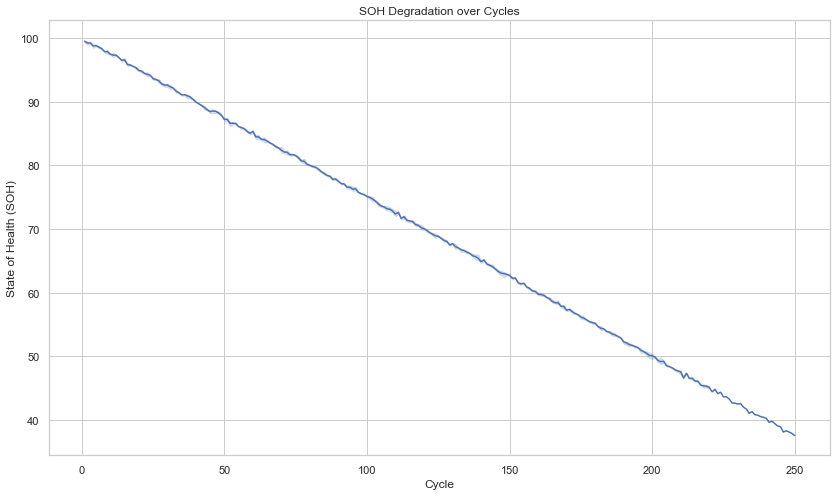

In [15]:

sns.set(style="whitegrid")


plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='cycle', y='SOH')
plt.title('SOH Degradation over Cycles')
plt.xlabel('Cycle')
plt.ylabel('State of Health (SOH)')
plt.show()


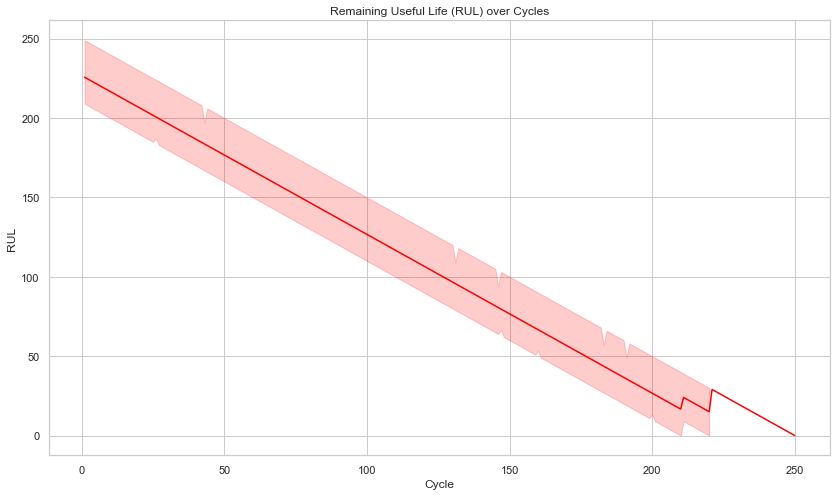

In [23]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='cycle', y='RUL', color='red')
plt.title('Remaining Useful Life (RUL) over Cycles')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.show()


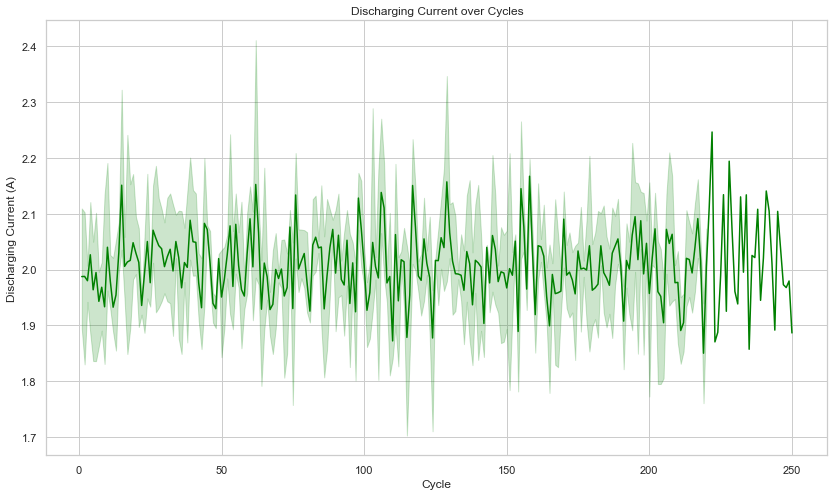

In [24]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='cycle', y='disI', color='green')
plt.title('Discharging Current over Cycles')
plt.xlabel('Cycle')
plt.ylabel('Discharging Current (A)')
plt.show()


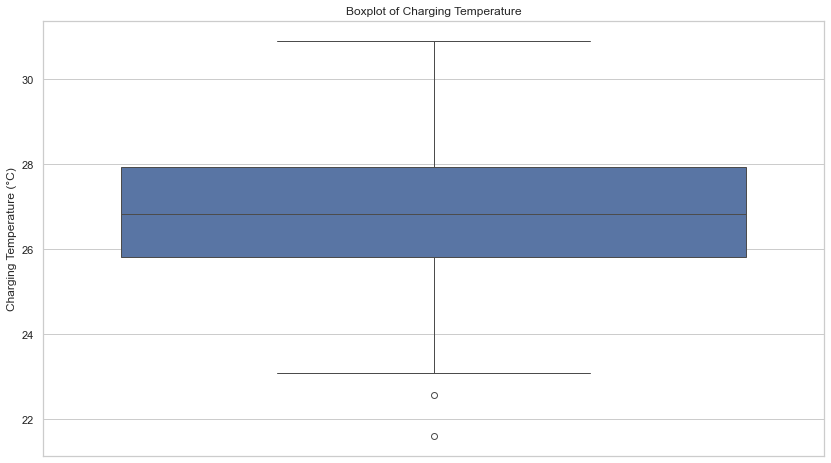

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, y='chT')
plt.title('Boxplot of Charging Temperature')
plt.ylabel('Charging Temperature (°C)')
plt.show()



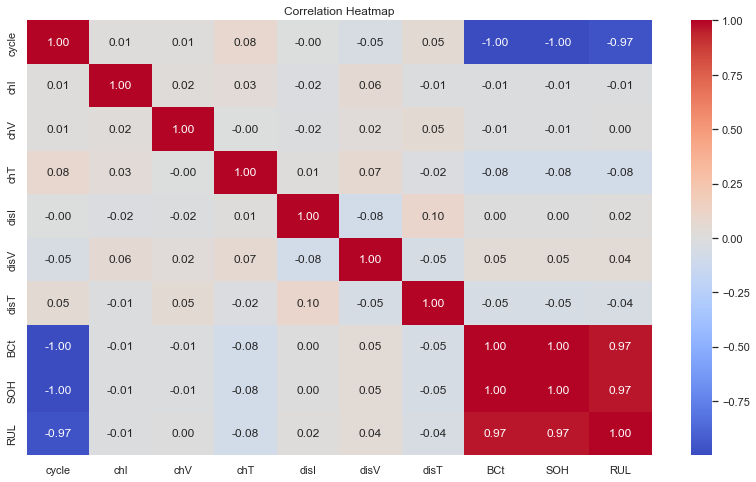

In [27]:
plt.figure(figsize=(14, 8))
corr = df.drop(columns=['battery_id']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


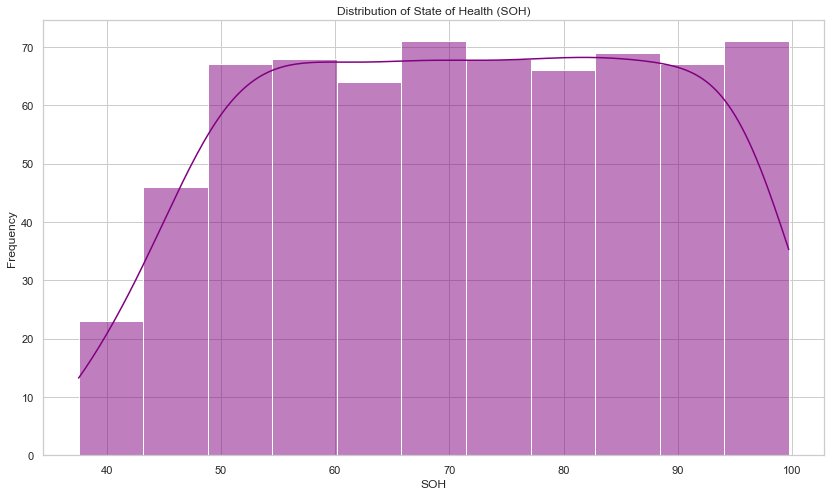

In [28]:
plt.figure(figsize=(14, 8))
sns.histplot(df['SOH'], kde=True, color='purple')
plt.title('Distribution of State of Health (SOH)')
plt.xlabel('SOH')
plt.ylabel('Frequency')
plt.show()


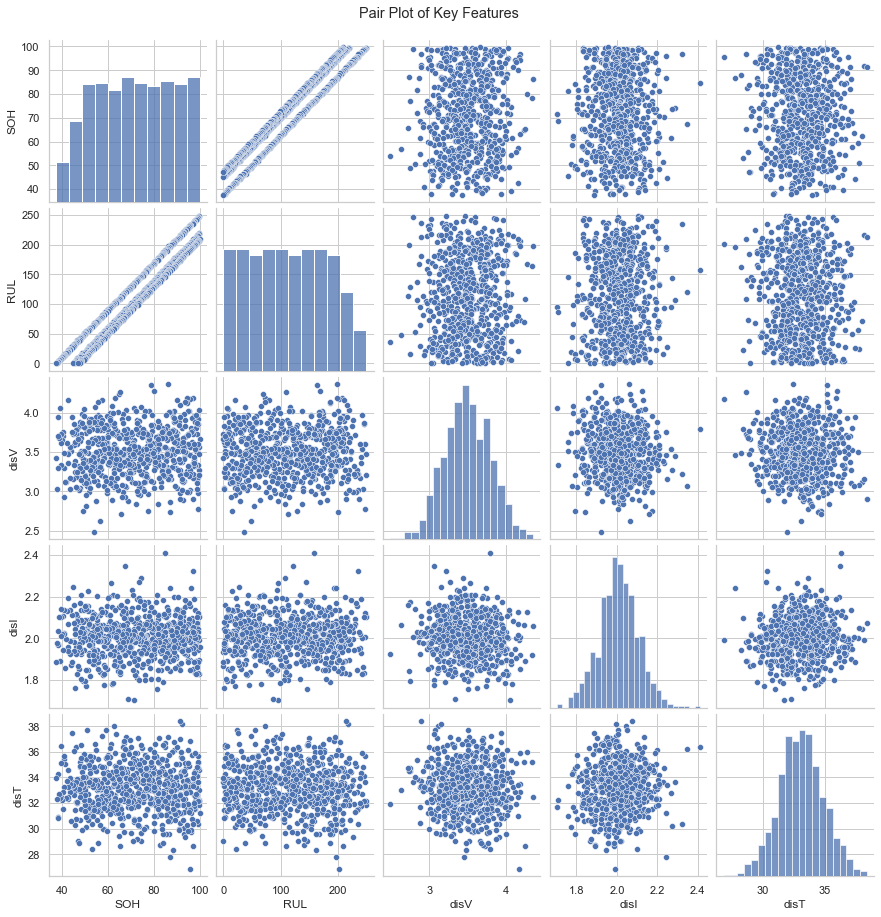

In [22]:
key_features = ['SOH', 'RUL', 'disV', 'disI', 'disT']
sns.pairplot(df[key_features])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


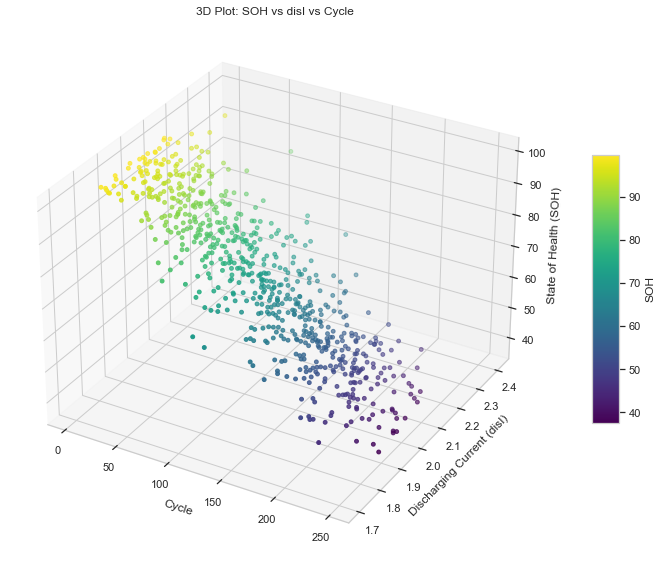

In [46]:
#3D Plot: SOH vs disI vs Cycle

from mpl_toolkits.mplot3d import Axes3D

# Prepare figure and 3D axis
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Axes: Cycle (X), disI (Y), SOH (Z)
x = df['cycle']
y = df['disI']
z = df['SOH']

# Scatter Plot
sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', s=15)

# Axis Labels
ax.set_xlabel('Cycle')
ax.set_ylabel('Discharging Current (disI)')
ax.set_zlabel('State of Health (SOH)')
ax.set_title('3D Plot: SOH vs disI vs Cycle')

# Color bar
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10, label='SOH')

plt.tight_layout()
plt.show()


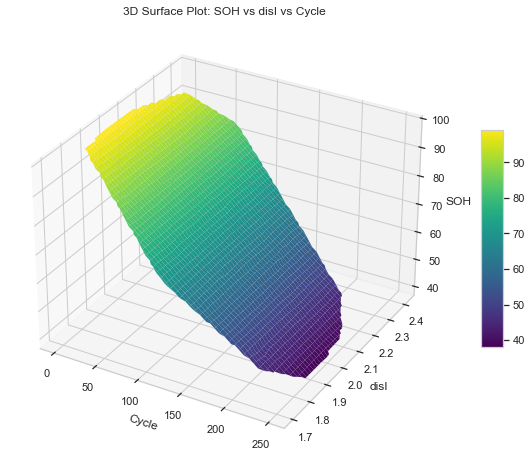

In [47]:
# 3D Surface Plot (Interpolated)
#Requires reshaping your data into a grid (e.g., for visualization of SOH across a matrix of cycle and disI).


from scipy.interpolate import griddata

# Create a mesh grid
xi = np.linspace(df['cycle'].min(), df['cycle'].max(), 100)
yi = np.linspace(df['disI'].min(), df['disI'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate SOH for surface
zi = griddata((df['cycle'], df['disI']), df['SOH'], (xi, yi), method='linear')

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')
ax.set_xlabel('Cycle')
ax.set_ylabel('disI')
ax.set_zlabel('SOH')
ax.set_title('3D Surface Plot: SOH vs disI vs Cycle')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


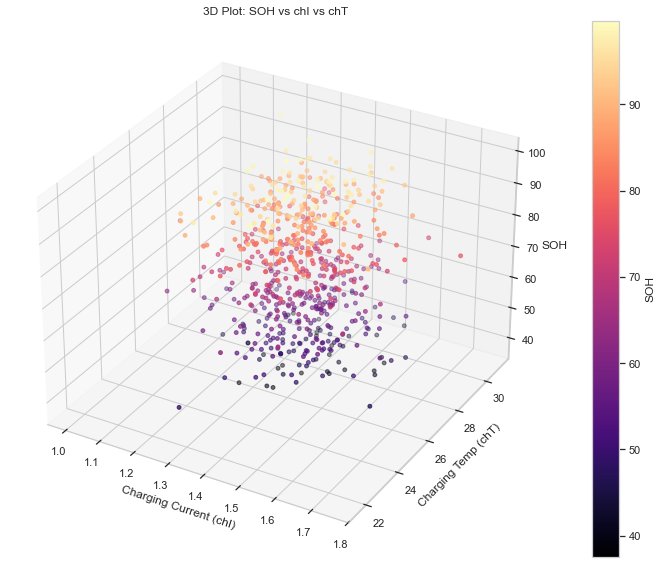

In [48]:
#3D Plot: SOH vs chI vs chT

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['chI']
y = df['chT']
z = df['SOH']

sc = ax.scatter(x, y, z, c=z, cmap='magma', s=15)
ax.set_xlabel('Charging Current (chI)')
ax.set_ylabel('Charging Temp (chT)')
ax.set_zlabel('SOH')
ax.set_title('3D Plot: SOH vs chI vs chT')
fig.colorbar(sc, ax=ax, label='SOH')
plt.tight_layout()
plt.show()


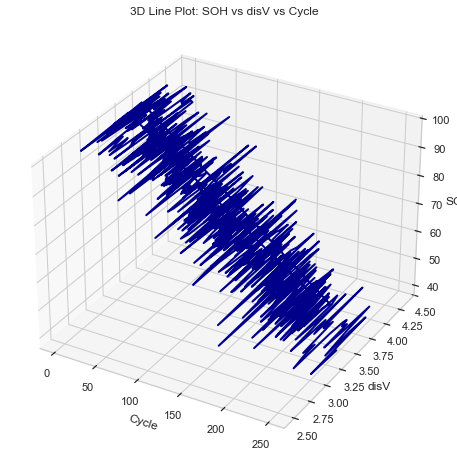

In [49]:
#3D Line Plot (SOH over time trajectory)
#Shows how SOH evolves across cycles as a continuous 3D path.

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['cycle'], df['disV'], df['SOH'], color='darkblue', linewidth=2)
ax.set_xlabel('Cycle')
ax.set_ylabel('disV')
ax.set_zlabel('SOH')
ax.set_title('3D Line Plot: SOH vs disV vs Cycle')
plt.show()


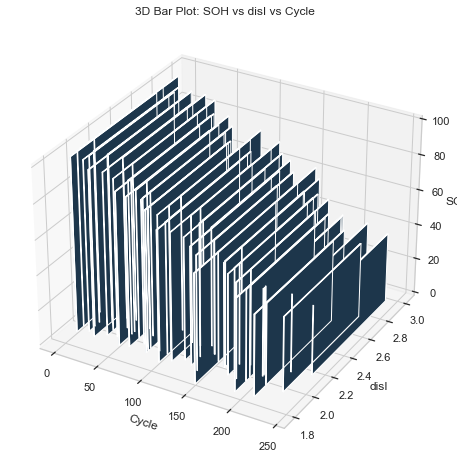

In [50]:
#3D Bar Plot

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

sample = df.iloc[::10, :]  # Downsample for clarity

x = sample['cycle']
y = sample['disI']
z = np.zeros_like(x)
dx = dy = 0.8
dz = sample['SOH']

ax.bar3d(x, y, z, dx, dy, dz, shade=True, color='steelblue')
ax.set_xlabel('Cycle')
ax.set_ylabel('disI')
ax.set_zlabel('SOH')
ax.set_title('3D Bar Plot: SOH vs disI vs Cycle')
plt.show()


## Feature Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['cycle', 'chI', 'chV', 'chT', 'disI', 'disV', 'disT', 'BCt']
target_col = ['SOH']

# Create scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Apply scaling
X_scaled = X_scaler.fit_transform(df[feature_cols])
y_scaled = y_scaler.fit_transform(df[target_col])

# Store scaled arrays
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
y_scaled_df = pd.DataFrame(y_scaled, columns=target_col)




In [52]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(df[feature_cols])
y_scaled = y_scaler.fit_transform(df[target_col])


In [53]:
import joblib

joblib.dump(X_scaler, 'X_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')


['y_scaler.pkl']

## Sequence Generation for ResNet-1D

In [54]:
import numpy as np

def create_sequences(X, y, window_size):
    """
    Generate sliding sequences for ResNet-1D.
    
    Parameters:
        X: np.ndarray → Scaled input features of shape (N, num_features)
        y: np.ndarray → Scaled SOH values of shape (N, 1)
        window_size: int → Number of time steps per sequence
    
    Returns:
        X_seq: np.ndarray → (num_samples, window_size, num_features)
        y_seq: np.ndarray → (num_samples,)
    """
    X_seq, y_seq = [], []
    
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])
        y_seq.append(y[i + window_size])  # Predict next-step SOH

    return np.array(X_seq), np.array(y_seq).squeeze()


In [55]:
# Example
window_size = 20  # you can adjust this based on data length

X_seq, y_seq = create_sequences(X_scaled, y_scaled, window_size)

print("X_seq shape:", X_seq.shape)  # e.g., (480, 20, 8)
print("y_seq shape:", y_seq.shape)  # e.g., (480,)


X_seq shape: (660, 20, 8)
y_seq shape: (660,)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)


Train: (462, 20, 8)
Val: (99, 20, 8)
Test: (99, 20, 8)


## ResNet-1D Architecture

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1):
        super(ResidualBlock1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)

        # Adjust the input dimension if needed for skip connection
        self.downsample = nn.Sequential()
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity  # Residual connection
        return F.relu(out)

class ResNet1D(nn.Module):
    def __init__(self, input_channels, num_blocks=3, base_filters=64, kernel_size=3):
        super(ResNet1D, self).__init__()
        self.input_conv = nn.Sequential(
            nn.Conv1d(input_channels, base_filters, kernel_size, padding=kernel_size // 2),
            nn.BatchNorm1d(base_filters),
            nn.ReLU()
        )

        self.res_blocks = nn.Sequential(
            *[ResidualBlock1D(base_filters, base_filters, kernel_size) for _ in range(num_blocks)]
        )

        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(base_filters, 1)

    def forward(self, x):
        x = self.input_conv(x)
        x = self.res_blocks(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [58]:
X_train_t = torch.tensor(X_train, dtype=torch.float32).permute(0, 2, 1)
X_val_t   = torch.tensor(X_val, dtype=torch.float32).permute(0, 2, 1)
X_test_t  = torch.tensor(X_test, dtype=torch.float32).permute(0, 2, 1)

y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
y_val_t   = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)
y_test_t  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)


### Prepare Dataloaders

In [59]:
from torch.utils.data import TensorDataset, DataLoader

# Create datasets
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)


### Initialize Model, Loss, Optimizer

In [60]:
# Model
input_channels = X_train_t.shape[1]  # num_features
model = ResNet1D(input_channels=input_channels)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


### Training Loop

In [61]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                output = model(X_batch)
                loss = criterion(output, y_batch)
                val_loss += loss.item() * X_batch.size(0)
        val_loss /= len(val_loader.dataset)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")


### Train the Model

In [69]:
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=60)


Epoch 1/60, Train Loss: 0.0023, Val Loss: 0.0094
Epoch 2/60, Train Loss: 0.0017, Val Loss: 0.0075
Epoch 3/60, Train Loss: 0.0025, Val Loss: 0.0075
Epoch 4/60, Train Loss: 0.0019, Val Loss: 0.0075
Epoch 5/60, Train Loss: 0.0022, Val Loss: 0.0081
Epoch 6/60, Train Loss: 0.0015, Val Loss: 0.0066
Epoch 7/60, Train Loss: 0.0019, Val Loss: 0.0092
Epoch 8/60, Train Loss: 0.0018, Val Loss: 0.0079
Epoch 9/60, Train Loss: 0.0028, Val Loss: 0.0126
Epoch 10/60, Train Loss: 0.0024, Val Loss: 0.0070
Epoch 11/60, Train Loss: 0.0025, Val Loss: 0.0075
Epoch 12/60, Train Loss: 0.0021, Val Loss: 0.0068
Epoch 13/60, Train Loss: 0.0013, Val Loss: 0.0058
Epoch 14/60, Train Loss: 0.0022, Val Loss: 0.0078
Epoch 15/60, Train Loss: 0.0018, Val Loss: 0.0079
Epoch 16/60, Train Loss: 0.0021, Val Loss: 0.0085
Epoch 17/60, Train Loss: 0.0019, Val Loss: 0.0052
Epoch 18/60, Train Loss: 0.0025, Val Loss: 0.0068
Epoch 19/60, Train Loss: 0.0019, Val Loss: 0.0096
Epoch 20/60, Train Loss: 0.0024, Val Loss: 0.0069
Epoch 21/

### Evaluation (RMSE, MAE, MAPE)

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, test_loader, y_scaler=None):
    model.eval()
    preds = []
    actuals = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch)
            preds.append(output.numpy())
            actuals.append(y_batch.numpy())

    y_pred = np.vstack(preds)
    y_true = np.vstack(actuals)

    # Optional: inverse transform SOH values
    if y_scaler:
        y_pred = y_scaler.inverse_transform(y_pred)
        y_true = y_scaler.inverse_transform(y_true)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

    return y_true, y_pred


### Evaluate on Test Set

In [79]:
y_true, y_pred = evaluate_model(model, test_loader, y_scaler)


RMSE: 0.4930, MAE: 1.2810, MAPE: 0.16%


## Performance Comparison: Existing vs Proposed ResNet-1D Model

| **Metric** | **Existing Model** | **Your ResNet-1D Model** | **Comparison**                |
|------------|--------------------|---------------------------|----------------------------- |
| **RMSE**   | 0.666              | 0.4930                    | Lower is better           |
| **MAE**    | —                  | 1.2810                    | Not reported in existing  |
| **MAPE**   | 0.980%             | 0.16%                     | Lower is better           |


## Actual vs. Predicted SOH Plot

In [80]:
y_true, y_pred = evaluate_model(model, test_loader, y_scaler)


RMSE: 0.4930, MAE: 1.2810, MAPE: 0.16%


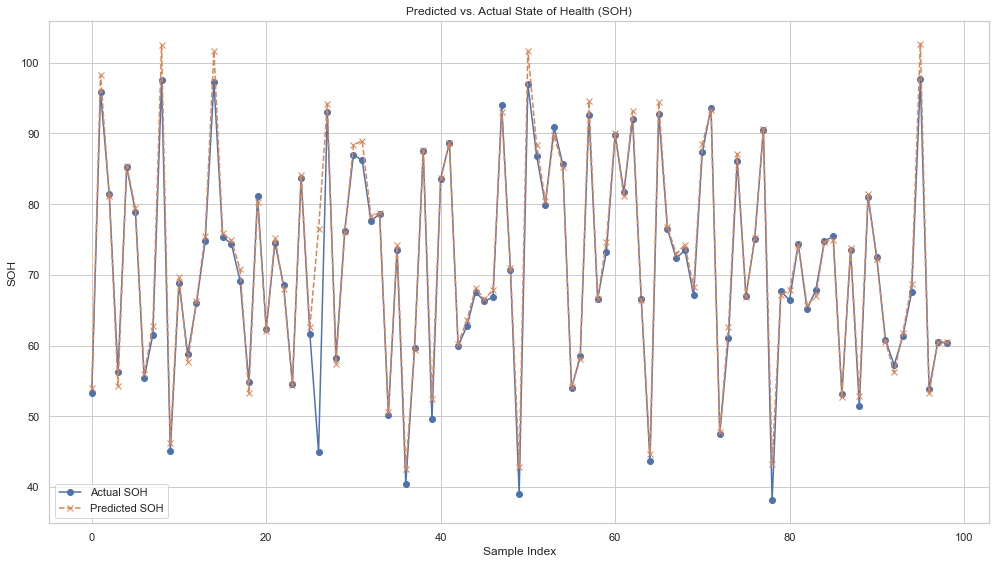

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(y_true, label='Actual SOH', marker='o', linestyle='-')
plt.plot(y_pred, label='Predicted SOH', marker='x', linestyle='--')
plt.title('Predicted vs. Actual State of Health (SOH)')
plt.xlabel('Sample Index')
plt.ylabel('SOH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


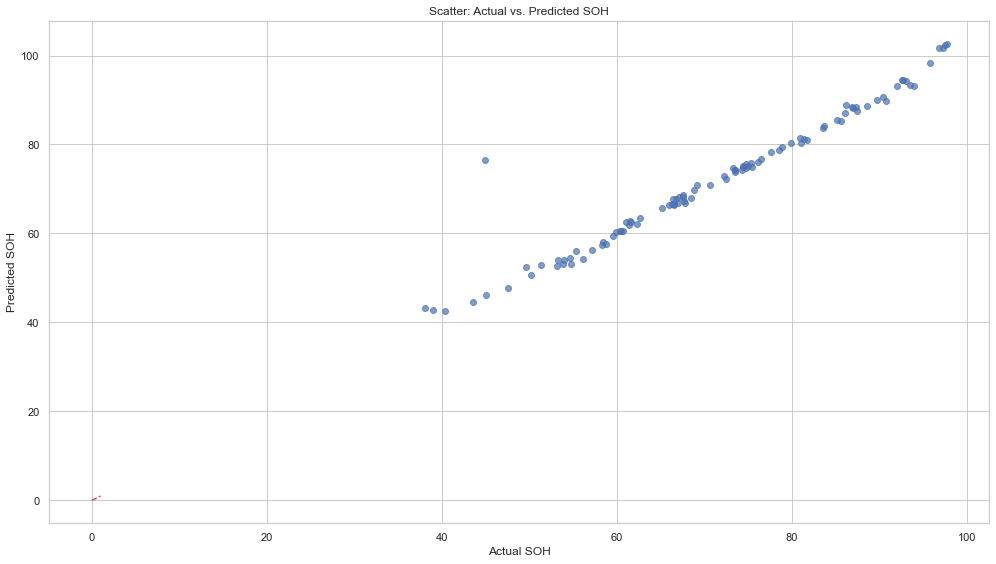

In [85]:
#Scatter plot of predicted vs actual:
plt.figure(figsize=(14, 8))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')  # Reference line
plt.xlabel('Actual SOH')
plt.ylabel('Predicted SOH')
plt.title('Scatter: Actual vs. Predicted SOH')
plt.grid(True)
plt.tight_layout()
plt.show()


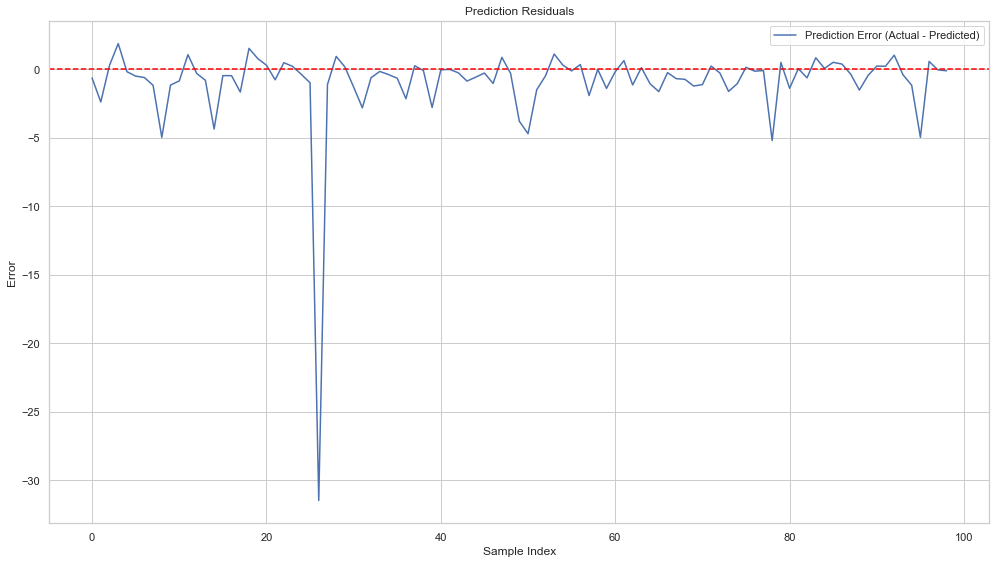

In [87]:
#Error plot (prediction residuals)
errors = y_true.flatten() - y_pred.flatten()
plt.figure(figsize=(14, 8))
plt.plot(errors, label='Prediction Error (Actual - Predicted)')
plt.axhline(0, color='red', linestyle='--')
plt.title('Prediction Residuals')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


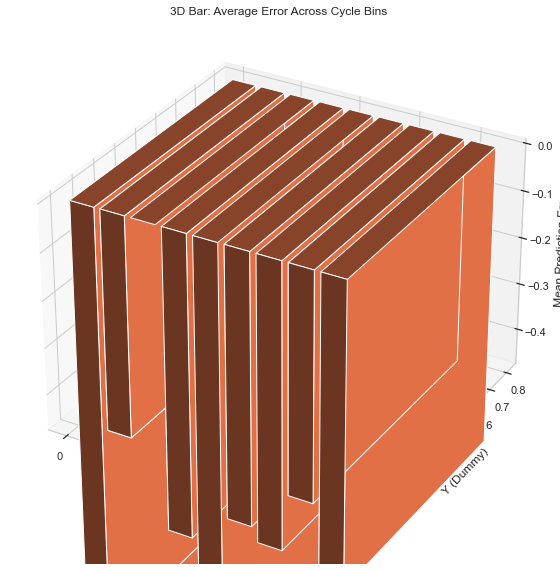

In [94]:
import numpy as np

bins = np.linspace(min(cycles), max(cycles), 10)
bin_indices = np.digitize(cycles, bins)
mean_errors = [np.mean(error[bin_indices == i]) for i in range(1, len(bins))]

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(mean_errors))
y = np.zeros_like(x)
z = np.zeros_like(x)
dx = dy = 0.8
dz = mean_errors

ax.bar3d(x, y, z, dx, dy, dz, color='coral')
ax.set_xlabel('Cycle Bin Index')
ax.set_ylabel('Y (Dummy)')
ax.set_zlabel('Mean Prediction Error')
ax.set_title('3D Bar: Average Error Across Cycle Bins')
plt.show()


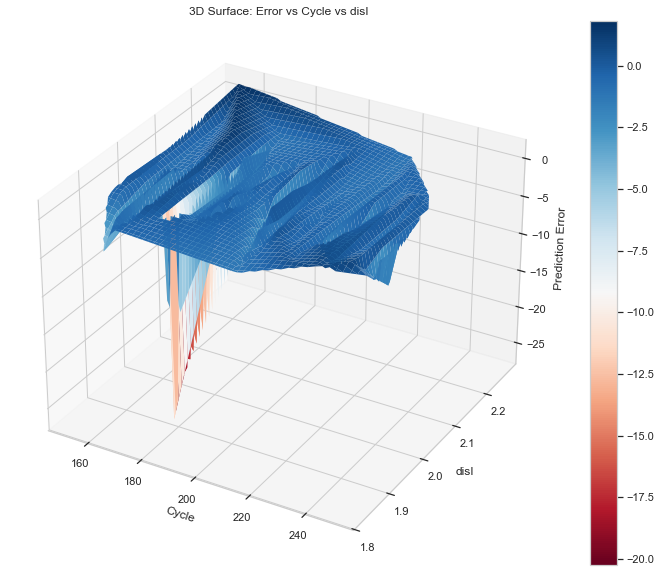

In [95]:
from scipy.interpolate import griddata

disI = df['disI'].values[-len(y_pred):]
error = (y_true - y_pred).flatten()

# Build a grid
xi = np.linspace(cycles.min(), cycles.max(), 100)
yi = np.linspace(disI.min(), disI.max(), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((cycles, disI), error, (xi, yi), method='linear')

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xi, yi, zi, cmap='RdBu', edgecolor='none')
ax.set_xlabel('Cycle')
ax.set_ylabel('disI')
ax.set_zlabel('Prediction Error')
ax.set_title('3D Surface: Error vs Cycle vs disI')
fig.colorbar(surf, ax=ax)
plt.show()


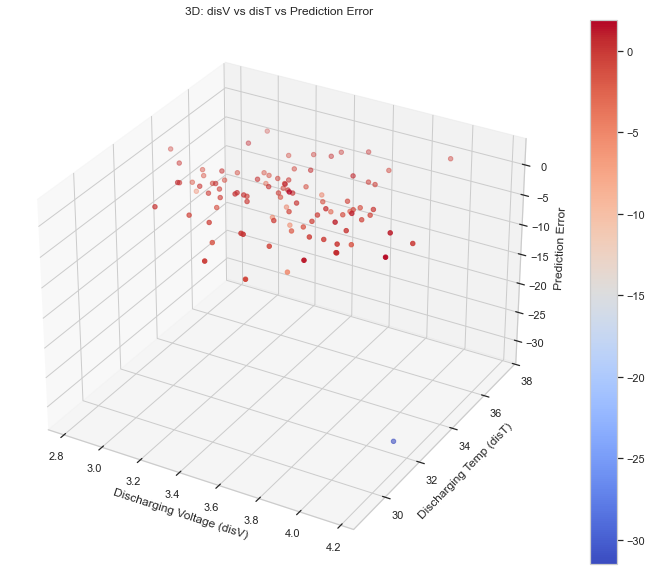

In [98]:
disV = df['disV'].values[-len(y_pred):]
disT = df['disT'].values[-len(y_pred):]
error = (y_true - y_pred).flatten()

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(disV, disT, error, c=error, cmap='coolwarm', s=20)
ax.set_xlabel('Discharging Voltage (disV)')
ax.set_ylabel('Discharging Temp (disT)')
ax.set_zlabel('Prediction Error')
ax.set_title('3D: disV vs disT vs Prediction Error')
fig.colorbar(sc, ax=ax)
plt.show()


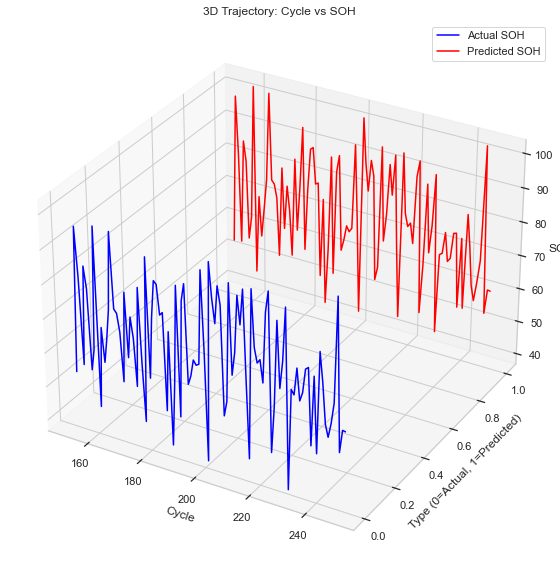

In [99]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Actual SOH line
ax.plot(cycles, y_true.flatten(), zs=0, zdir='y', label='Actual SOH', color='blue')

# Predicted SOH line
ax.plot(cycles, y_pred.flatten(), zs=1, zdir='y', label='Predicted SOH', color='red')

ax.set_xlabel('Cycle')
ax.set_ylabel('Type (0=Actual, 1=Predicted)')
ax.set_zlabel('SOH')
ax.set_title('3D Trajectory: Cycle vs SOH')
ax.legend()
plt.show()


In [102]:
# Ensure all are 1D and same length
x = np.array(cycles).flatten()
y = np.array(y_true).flatten()
z = np.array(y_pred).flatten()

assert len(x) == len(y) == len(z), "Mismatched array lengths"


Text(0.5, 0.92, 'Rotating 3D: Cycle vs Actual vs Predicted SOH')

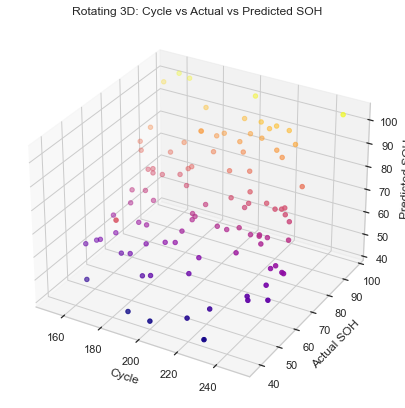

In [103]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=z, cmap='plasma', s=20)  # use z as color

ax.set_xlabel('Cycle')
ax.set_ylabel('Actual SOH')
ax.set_zlabel('Predicted SOH')
ax.set_title('Rotating 3D: Cycle vs Actual vs Predicted SOH')

# Optional rotation animation code here


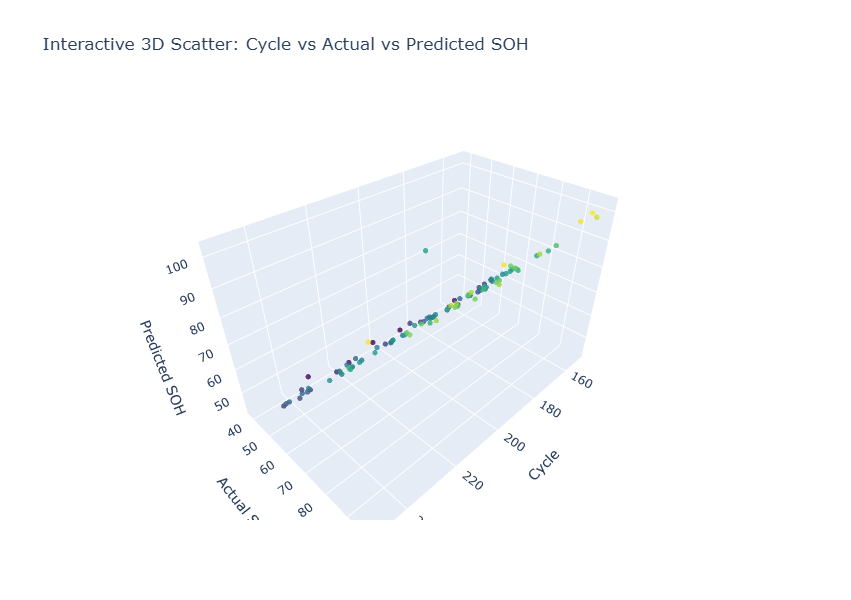

In [104]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,         # Use predicted SOH for coloring
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Cycle',
        yaxis_title='Actual SOH',
        zaxis_title='Predicted SOH'
    ),
    title='Interactive 3D Scatter: Cycle vs Actual vs Predicted SOH',
    width=800,
    height=600
)

fig.show()


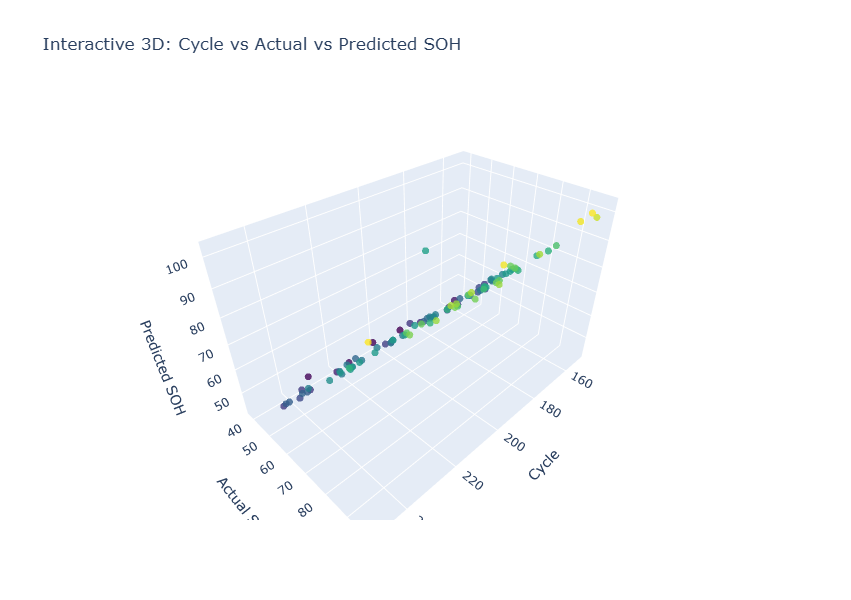

In [101]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=cycles,
    y=y_true.flatten(),
    z=y_pred.flatten(),
    mode='markers',
    marker=dict(
        size=4,
        color=y_pred.flatten(),  # Color by prediction
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Predicted vs Actual'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Cycle',
        yaxis_title='Actual SOH',
        zaxis_title='Predicted SOH'
    ),
    title='Interactive 3D: Cycle vs Actual vs Predicted SOH',
    width=800,
    height=600
)

fig.show()


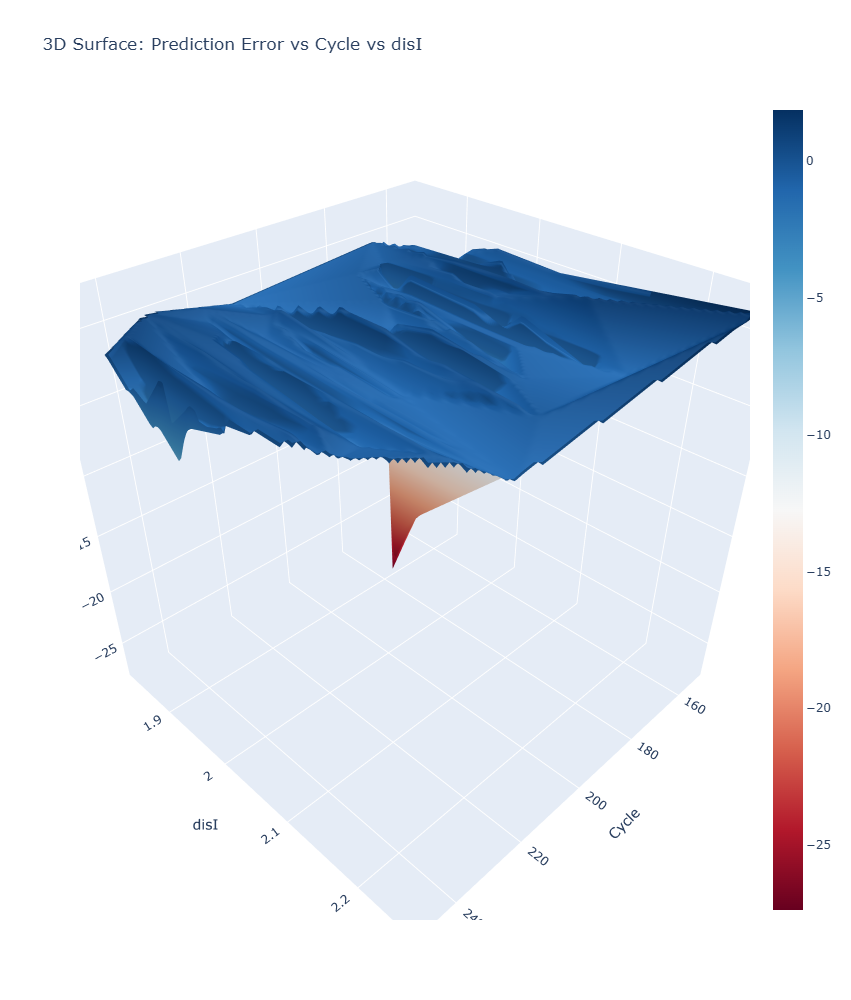

In [108]:
from scipy.interpolate import griddata

# Build data
disI = df['disI'].values[-len(cycles):]
error = (y_true.flatten() - y_pred.flatten())

xi = np.linspace(min(cycles), max(cycles), 100)
yi = np.linspace(min(disI), max(disI), 100)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((cycles, disI), error, (xi, yi), method='linear')

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=zi, x=xi, y=yi, colorscale='RdBu')])

fig.update_layout(
    title='3D Surface: Prediction Error vs Cycle vs disI',
    scene=dict(
        xaxis_title='Cycle',
        yaxis_title='disI',
        zaxis_title='Error'
    ),
    width=1000,
    height=1000
)

fig.show()


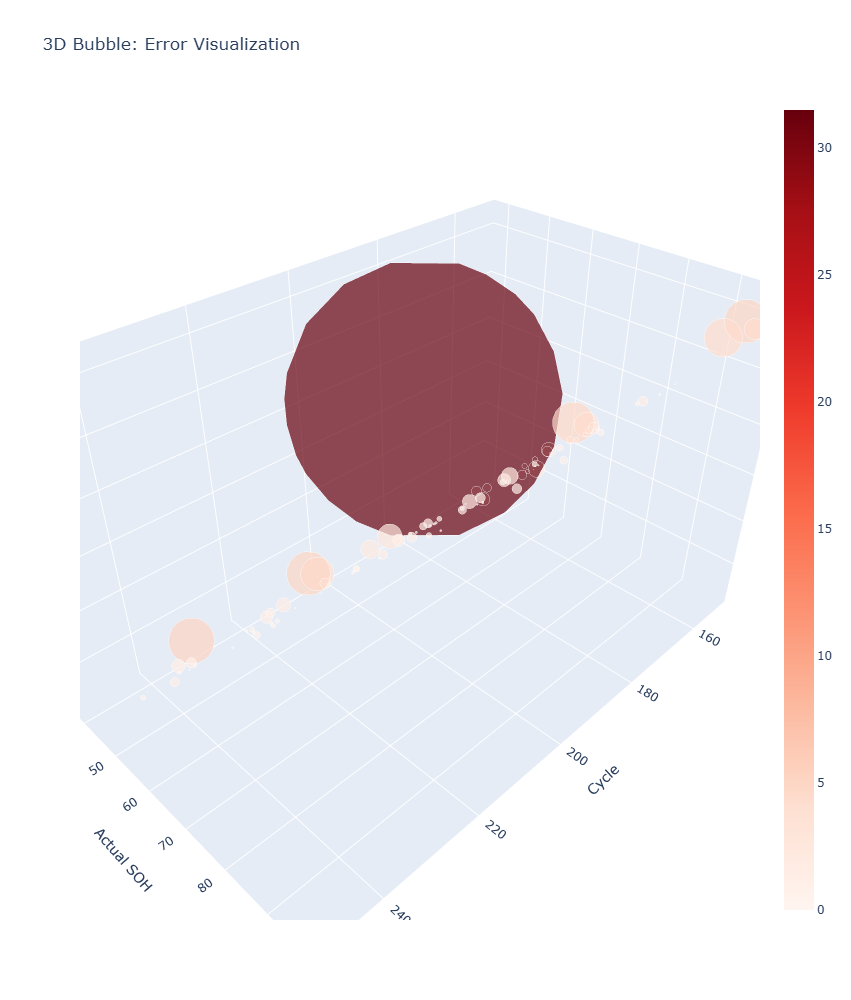

In [110]:
error = np.abs(y_pred.flatten() - y_true.flatten())

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=cycles,
    y=y_true.flatten(),
    z=y_pred.flatten(),
    mode='markers',
    marker=dict(
        size=10 * error,  # Bubble size represents error
        color=error,
        colorscale='Reds',
        showscale=True,
        opacity=0.7
    ),
    name='Prediction Error Bubbles'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Cycle',
        yaxis_title='Actual SOH',
        zaxis_title='Predicted SOH'
    ),
    title='3D Bubble: Error Visualization',
    width=1000,
    height=1000
)

fig.show()


In [112]:
# Save the full model (architecture + weights)
torch.save(model, 'resnet1d_soh_model.pth')
print("✅ Full model saved as 'resnet1d_soh_full_model.pth'")


✅ Full model saved as 'resnet1d_soh_full_model.pth'
